In [1]:
# Load in the data
from sklearn.datasets import load_breast_cancer

In [2]:
# load the data
data = load_breast_cancer()

In [3]:
# check the type of 'data'
type(data)

sklearn.utils.Bunch

In [4]:
# note: it is a Bunch object
# this basically acts like a dictionary where you can treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
# 'data' (the attribute) means the input data
data.data.shape
# it has 569 samples, 30 features

(569, 30)

In [6]:
# 'targets'
data.target
# note how the targets are just 0s and 1s
# normally, when you have K targets, they are labeled 0..K-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
# their meaning is not lost
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
# there are also 569 corresponding targets
data.target.shape

(569,)

In [9]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
# normally we would put all of our imports at the top
# but this lets us tell a story
from sklearn.model_selection import train_test_split
# split the data into train and test sets
# this lets us simulate how our model will perform in the future

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [12]:
# Scale the data
# you'll learn why scaling is needed in a later course
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
import tensorflow as tf
# Now all the fun Tensorflow stuff
# Build the model
model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(D,)),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

In [22]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 13ms/step - loss: 220.4790 - accuracy: 0.3858 - val_loss: 241.5437 - val_accuracy: 0.3457
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 211.2730 - accuracy: 0.3858 - val_loss: 231.3354 - val_accuracy: 0.3457
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 202.0187 - accuracy: 0.3858 - val_loss: 221.1671 - val_accuracy: 0.3457
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 193.0724 - accuracy: 0.3858 - val_loss: 210.8349 - val_accuracy: 0.3457
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 183.7227 - accuracy: 0.3858 - val_loss: 200.7073 - val_accuracy: 0.3457
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 174.6273 - accuracy: 0.3858 - val_loss: 190.4959 - val_accuracy: 0.3457
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 165.4294 - accuracy: 0.3858 - val_loss: 180.2880 - val_a

In [25]:
# Evaluate the model - evaluate() returns loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.8533 - accuracy: 0.8740
Train score: [0.8532787561416626, 0.874015748500824]
6/6 [==============================] - 0s 1ms/step - loss: 1.0840 - accuracy: 0.8298
Test score: [1.083996295928955, 0.8297872543334961]


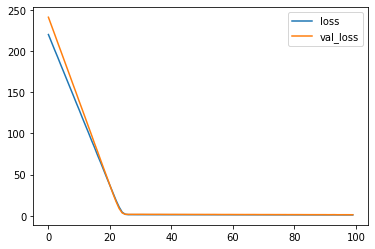

In [26]:
# Plot what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()